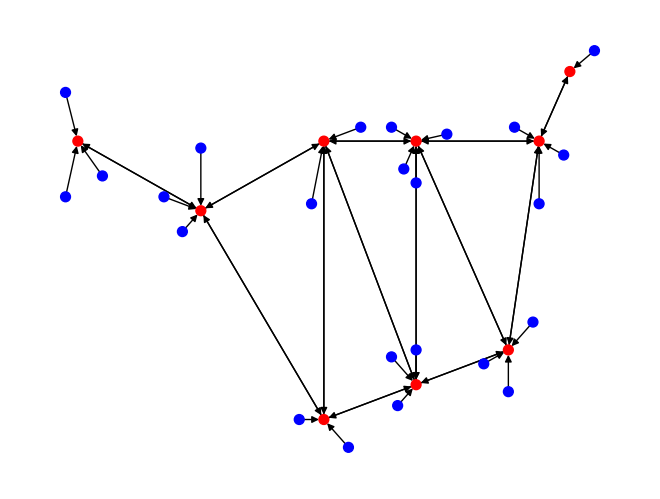

Presolving model
125 rows, 258 cols, 417 nonzeros
125 rows, 258 cols, 417 nonzeros
Presolve : Reductions: rows 125(-173); columns 258(-206); elements 417(-263)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     1.5196613722e+08 Pr: 42(2.39426e+07) 0s
         81     3.7520693547e+08 Pr: 0(0); Du: 0(2.22045e-16) 0s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 81
Objective value     :  3.7520693547e+08
HiGHS run time      :          0.00
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: 375206935.47234315
  Upper bound: 375206935.47234315
 

In [16]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jul 11 09:28:58 2024

@author: JNI
"""

import pandas as pd
import random as rnd
import regions_integrated2
from pyomo.environ import *

"""
THIS IS A SIMPLE SCRIPT THAT USES A MADE UP DEMAND AND PRICES

it imports the region class, generates a grid, creates a model object running
in 'integrated' mode with the price and demand as inputs, builds the model and
saves the return value as copied model
"""


# generate some price and demand data


def demand_curve(h2_price_data, iteration=1):
    h2_price_data['demand_' + str(iteration)] = (
        (1 - h2_price_data['price'] / (30 * 1.05 ** (h2_price_data['year'] - 2024)))
        * 500000
        * 1.2 ** (h2_price_data['year'] - 2024)
    )
    return h2_price_data


# read a csv file for demand as a df and append prices to it
data_price = demand_curve(
    pd.read_csv('C:/Users/MLJ/Downloads/H2/regionality and hubs/h2_price.csv')
)

# convert the df into dicts
price = {
    (region, year): data_price[
        (data_price['region'] == region) & (data_price['year'] == year)
    ].iloc[0]['price']
    * 0.04
    for region in data_price['region'].unique()
    for year in data_price['year'].unique()
}
demand = {
    (region, year): data_price[
        (data_price['region'] == region) & (data_price['year'] == year)
    ].iloc[0]['demand_1']
    for region in data_price['region'].unique()
    for year in data_price['year'].unique()
}

# create a grid instance loading from data, and build it
grid = regions_integrated2.Grid(regions_integrated2.Data())
grid.build_grid()

# create a model instance that takes the grid as input, runs in integrated mode
# and takes demand and electricity_price as inputs.
#
model = regions_integrated2.Model(grid, mode='integrated', demand=demand, electricity_price=price)

# start_build builds a pyomo block and returns it as a value saved as copied_model
copied_model = model.start_build()

# big model is a concrete model, and we attach the block copied_model to it as little
bigmodel = ConcreteModel()
bigmodel.little = copied_model

# solve bigmodel and it solves little

solver = SolverFactory('appsi_highs')
solver.solve(bigmodel, tee=True).write()

In [17]:
####################################################################################################################
####################################################################################################################
# PRE-PROCESSING
####################################################################################################################
####################################################################################################################


# Import pacakges
from datetime import datetime
import numpy as np
import pandas as pd
import pyomo.environ as pyo
import gc
import highspy
from pyomo.common.timing import TicTocTimer
import os


import sympy as sp
import statsmodels.api as sm


# import scripts
import preprocessor_simple as prep
# import postprocessor as post

####################################################################################################################

In [18]:
############################################
# RUN NEWW ECM MODEL BY ITSELF
############################################
model3 = pyo.ConcreteModel(name='MultiBlock')
model3.dual = pyo.Suffix(direction=pyo.Suffix.IMPORT)

test_years = list(
    pd.read_csv('C:/Users/MLJ/Downloads/ECM Simple/input/sw_year.csv').dropna()['year']
)
test_regions = list(
    pd.read_csv('C:/Users/MLJ/Downloads/ECM Simple/input/sw_reg.csv').dropna()['region']
)

all_frames, setin = prep.preprocessor(
    prep.Sets(test_years, test_regions), 'C:/Users/MLJ/Downloads/ECM Simple/input/temp/'
)

model3.year = pyo.Set(initialize=setin.y)
model3.regions = pyo.Set(initialize=range(7, 8))

model3.electricity_price = pyo.Param(model3.regions, model3.year, mutable=True, default=0)

# create a model instance that takes the grid as input, runs in integrated mode
# and takes demand and electricity_price as inputs.
#
model = regions_integrated2.Model(
    grid, mode='integrated', demand=demand, electricity_price=model3.electricity_price
)

# start_build builds a pyomo block and returns it as a value saved as copied_model
copied_model = model.start_build()

# big model is a concrete model, and we attach the block copied_model to it as little
bigmodel = ConcreteModel()
bigmodel.little = copied_model

# solve bigmodel and it solves little

solver = SolverFactory('appsi_highs')
solver.solve(bigmodel, tee=True).write()

ERROR: Rule failed for Param 'little.electricity_price' with index (7, 2025):
KeyError: "Index '(7, 2025)' is not valid for indexed component
'little.electricity_price'"
ERROR: Constructing component 'little' from data=None failed: KeyError: "Index
'(7, 2025)' is not valid for indexed component 'little.electricity_price'"


KeyError: "Index '(7, 2025)' is not valid for indexed component 'little.electricity_price'"

In [20]:
model.regions.pprint()

AttributeError: 'dict' object has no attribute 'pprint'